# <center> Assignment 2 - Adaline Learning
###### Author: Rudraksh Kapil - 177154
In this notebook the following two tasks are accomplished:
1. Adaline learning algorithm on Iris Dataset for binary classification
2. Getting the weight values for AND, OR, XOR gates.
    
Adaline Changes:
1. Linear activation function used - unit step only used for output classification.
2. Linear activation output is used for the cost function
3. Gradient descent to minimise cost function
4. Feature standardisation / normalisation

### 1. Learning Algortihm for Iris Dataset

In [154]:
# import statements
from sklearn import datasets                           # only used to get the dataset
from sklearn.model_selection import train_test_split   # only used to split the train and test data
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

###### Get Iris Dataset and remove on of the classes.
Iris is sorted in order and it has 3 classes -> 50 class1, 50 class2, 50 class3. Therefore we need to only slice the iris dataset an extract the first 100 elements to get 50 of c1 and c2.

We do this because we want to perform binary classification.

In [155]:
iris = datasets.load_iris() 
X = iris.data[:100]
y = iris.target[:100]

# split the dataset randomly so we can test our algorithm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###### Visualise Data 
Confirming if it is linearly separable.

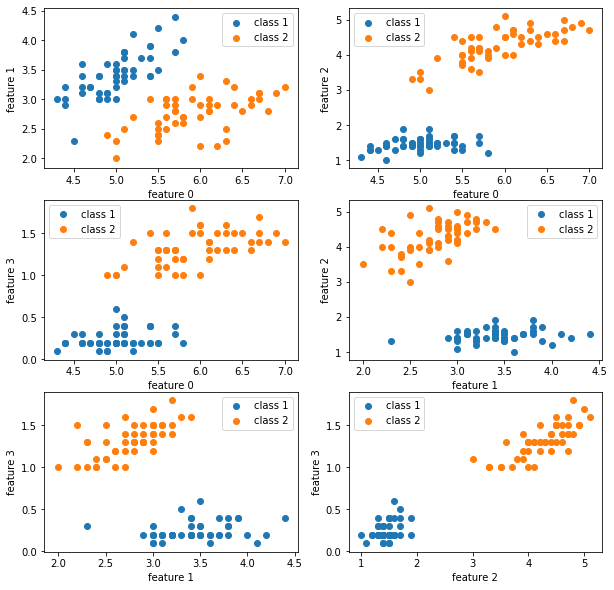

You can see that the data is linearly seperable overall becuase it is so for every pair of dimensions.


In [156]:
k = 1 # subplot counter
plt.figure(figsize=(10,10))  # set fig dimensions

# nc2 number of feature pairs = 6
for i in range(0,4):         # x axis feature
    for j in range(i+1, 4):  # y axis feature 
        
        # change subplot
        plt.subplot(3,2,k)   
        
        # plot values of the features classwise
        plt.scatter(X[:50,i], X[:50,j], label='class 1')
        plt.scatter(X[50:,i], X[50:,j], label='class 2')
        plt.xlabel(f'feature {i}')
        plt.ylabel(f'feature {j}')
        plt.legend()
        
        # update counter
        k += 1
        
plt.show()
print("You can see that the data is linearly seperable overall becuase it is so for every pair of dimensions.")

###### Define Cost Function
We use the sum of squared errors as the cost function:

$J(\theta) = \frac{1}{2} \sum^{m}_{i=1}{(y^{(i)}-\phi(z^{(i)}))}$

In this function we calculate cost given the part inside the brackets in the equation.

In [157]:
def cost_function(diff):
    return (diff**2).sum() / 2.0

###### Define Activation Function
Here we're using a linear activation, so just return X

In [158]:
def activation(X):
    return X

###### Define Training and Testing Functions
Using batch gradient descenct in training function. We also standardise the features (X) for better optimisation.

$\Delta w_j = \alpha \sum_{i}{(y^{(i)}-\phi(z^{(i)}))}x_{j}^{(i)}$

In [159]:
# training function of adaline
def adaline(X, y, num_iter, alpha, norm=False):
    # set weights randomly -> num_features + 1 for bias
    # scale by 100 to get small initial value
    w = np.random.randn(1, X.shape[1]+1) / 100
    
    # we use this to keep track of cost at each iteration
    cost_history = []  
    
    # standardise X -> note: have to return 
    # mean and std devs so that they can be used at test time
    if norm:
        means = np.mean(X, axis=0)
        stdevs = np.std(X, axis=0)
        features = (X - means) / stdevs
    else:
        means, stdevs = None, None
        
    # prepend a bias column of 1s to X 
    ones_col = np.ones((X.shape[0], 1))
    X = np.hstack((ones_col, X))

    # loop over number of iterations
    for epoch in range(num_iter):
        y_pred = activation(np.dot(w,X.T)) # predict outputs and pass through activation
        diff = y - y_pred                  # calculate abs error
        w += alpha * np.dot(diff,X)        # update w according to formula above
        cost = cost_function(diff)         # determine cost
        cost_history.append(cost)          # add to history
        
    # return weights and history, and normalistion stuff
    return (w, cost_history, means, stdevs)

In [160]:
# function to check accuracy on test set - vectorised
def predict(X_test, y_test, means=None, stdevs=None, norm=False, threshold=0):
    # have to standardise 
    if norm:
        X_test = (X_test - means) / stdevs
    
    # prepend a bias column of 1s to X 
    ones_col = np.ones((X_test.shape[0], 1))
    X_test = np.concatenate((ones_col, X_test), axis=1)

    # calculate predictions by taking activation of dot product
    y_pred = activation(np.dot(w, X_test.T))
    
    # threshold - to compensate for small errors
    y_pred[y_pred > threshold] = 1
    y_pred[y_pred <= threshold] = 0

    # get accuracy
    accuracy = np.mean(y_pred == y_test)
    print(f"Test Accuracy => {accuracy*100}%")
    
    # return predictions
    return y_pred

###### Run our algorithm by calling the above functions
Note: We get 100% accuracy because the data is actually linearly separable

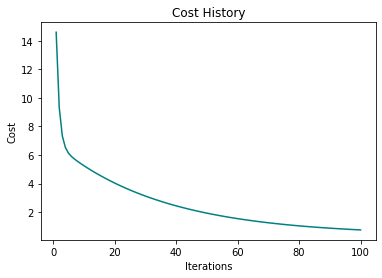

Final cost -> 0.7640552612218666
Test Accuracy => 100.0%


In [161]:
# set hyper parameters
num_iter = 100      # number of iterations
alpha = 0.0001      # learning rate
norm = True         # whether we standardise the features

# call traing to get the determined weights
w, cost_history, means, stdevs = adaline(X_train, y_train,num_iter, alpha, norm)

# plot history for training for analysis
epochs = np.arange(1, len(cost_history)+1)
plt.plot(epochs, cost_history, c='teal')
plt.title('Cost History')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()
print(f"Final cost -> {cost_history[-1]}")

# check our implementation on the test set
y_preds = predict(X_test, y_test, means, stdevs, norm)

# 2. Solution For Logic Gates

###### Functions to help create training dataset
For adaline, we need more unique data points, so we create those here. This function returns an nd.array of shape [n, 3], where the last column is filled with the y values specified. The first two columns contain n examples very close to (i,j) 

i.e. if i = 0, j = 1  =>  [0.01, 0.98]

In [162]:
spread = 20
base = 100.0
def get_samples(n, i, j, y):
    to_ret = np.ndarray((n, 3))
    to_ret[:, 2] = y
    to_ret[:, 0] = np.random.randint(i*base-spread,i*base+spread,size=n) / base   # i
    to_ret[:, 1] = np.random.randint(j*base-spread,j*base+spread,size=n) / base   # j
    return to_ret

Create each of the gates training data using truth table information. Also, we keep postive and negative examples balanced for better training.

In [163]:
n = 50
# AND
AND = np.vstack((get_samples(n,0,0,0), get_samples(n,0,1,0)))
AND = np.vstack((AND, get_samples(n,1,0,0)))
AND = np.vstack((AND, get_samples(n,1,1,1)))
AND = np.vstack((AND, get_samples(n,1,1,1)))
AND = np.vstack((AND, get_samples(n,1,1,1)))
np.random.shuffle(AND)

OR = np.vstack((get_samples(n,0,0,0), get_samples(n,0,1,1)))
OR = np.vstack((OR, get_samples(n,1,0,1)))
OR = np.vstack((OR, get_samples(n,1,1,1)))
OR = np.vstack((OR, get_samples(n,0,0,0)))
OR = np.vstack((OR, get_samples(n,0,0,0)))
OR = np.vstack((OR, get_samples(n,0,0,0)))

np.random.shuffle(OR)

###### Create test Dataset
Truth Tables For Each, where the last column is the output

In [164]:
AND_ACTUAL = np.asarray([(0,0,0),
                  (0,1,0),
                  (1,0,0),
                  (1,1,1)])

OR_ACTUAL = np.asarray([(0,0,0),
                 (0,1,1),
                 (1,0,1),
                 (1,1,1)])

###### Visualise Data and Expected Outputs
Here you can see the expected outputs according to the truth tables above.

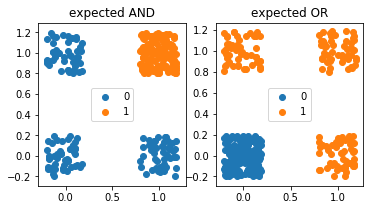

In [165]:
# set figure dimensions
plt.figure(figsize=(9,3))

# titles for each plot
titles = ['expected AND', 'expected OR', 'expected XOR']

# for each type of gate
for idx,gate in enumerate([AND, OR]):
    
    # change subplot
    plt.subplot(1,3,idx+1)
    plt.title(titles[idx])
    
    # X values are first 2 cols, y is final col (output)
    X = gate[:,:2]
    y = gate[:,-1]
    
    # separate the X values by output (for coloring in plots)
    X_zeros = X[y==0,:]
    X_ones  = X[y==1,:]
    
    # plot X values and color as y value
    plt.scatter(X_zeros[:,0], X_zeros[:,1], label = '0')
    plt.scatter(X_ones[:,0], X_ones[:,1], label = '1')  
    plt.legend(loc='center')

plt.show()

###### Helper Function to Test Output
This function tests the weights that our algorithm calculates and plots the output accordingly.
The testing is done by determining if the output (last col of X) is actually correct like the expected output above. Additionally, if the weight vector `w` is passed, we can see the line that seperates the two classes. 

Note: Because we are randomly initialising the weights, the line is different each time, but it is always correct.

In [166]:
# definition for function to test weights
def plot_stuff(X, w=None, threshold=0):
    # set plot dimenstions
    plt.figure(figsize=(3,3))
    plt.title("Calculated Output")
    plt.ylim((-0.1,1.1))
    plt.xlim((-0.1,1.1))
    
    # split X by output value (last col)
    X_zeros = X[X[:,2] <= 0,:]
    X_ones  = X[X[:,2] > 0,:]

    # plot X with y (last col) as color
    plt.scatter(X_zeros[:,0], X_zeros[:,1], label = '0')
    plt.scatter(X_ones[:,0], X_ones[:,1], label = '1')  
    plt.legend(loc='center')
    
    # if weights are given then plot line
    if w is not None:
        # plot line -> y = mx + c
        plt.title("Calculated Output - Line shows classifier")
        line_x = np.linspace(-0.5,1.5,100)
        line_y = (w[0,1]*line_x+w[0,0]) / -w[0,2] + (threshold / w[0,2])
        plt.plot(line_x, line_y, '-r', label='classifier')
    
    plt.show()

###### Solution for AND
Here we run the training function to calculate weights for `AND` gate, and then use these to plot the line that separated the outputs according to 1 or 0 correctly.

Bias, Weights => [[-0.24573188  0.5463535   0.58477869]]


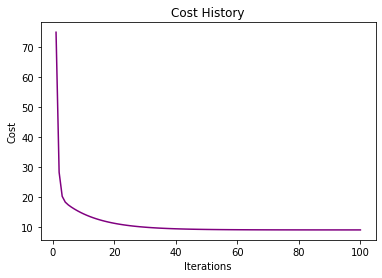

Final cost -> 9.088611739319921
Test Accuracy => 100.0%
[[0. 0. 0. 1.]]


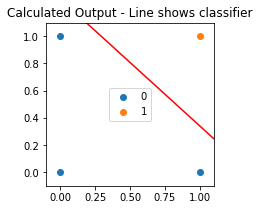

In [167]:
# get X and y
X = AND[:,0:2]
y = AND[:,2]

# solve to get weights
num_iter = 100
alpha = 0.001
w, cost_history, _, _ = adaline(X, y, num_iter, alpha)
#w = np.asarray([[-0.75,0.5,0.5]])
print(f"Bias, Weights => {w}")

# plot history for training for analysis
epochs = np.arange(1, len(cost_history)+1)
plt.plot(epochs, cost_history, c='purple')
plt.title('Cost History')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()
print(f"Final cost -> {cost_history[-1]}")


# check accuracy on test set
X = AND_ACTUAL[:,0:2]
y = AND_ACTUAL[:,2]
y_preds = predict(X, y, threshold=0.4)
print(y_preds)

# plot to check
y_preds = np.asarray(y_preds).reshape(-1,1)
X = np.concatenate((X,y_preds), axis=1)
plot_stuff(X, w, threshold=0.5)

###### Solution for OR
Here we run the training function to calculate weights for `OR` gate, and then use these to plot the line that separated the outputs according to 1 or 0 correctly.

Bias, Weights => [[0.0976875  0.55833014 0.60413653]]


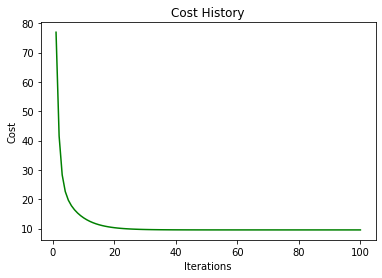

Final cost -> 9.528563986970532
Test Accuracy => 100.0%


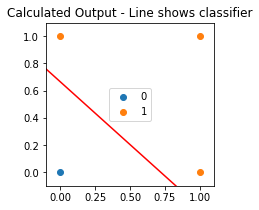

In [169]:
# get X and y
X = OR[:,0:2]
y = OR[:,2]

# solve to get weights
w, cost_history, _, _ = adaline(X, y, num_iter, alpha)
#w = np.asarray([[-0.25,0.5,0.5]])
print(f"Bias, Weights => {w}")

# plot history for training for analysis
epochs = np.arange(1, len(cost_history)+1)
plt.plot(epochs, cost_history, c='green')
plt.title('Cost History')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()
print(f"Final cost -> {cost_history[-1]}")

# check accuracy on test set
X = OR_ACTUAL[:,0:2]
y = OR_ACTUAL[:,2]
y_preds = predict(X, y, threshold=0.5)

# plot to check
y_preds = np.asarray(y_preds).reshape(-1,1)
X = np.concatenate((X,y_preds), axis=1)
plot_stuff(X, w, threshold=0.5)

###### <center> END OF ASSIGNMENT <br><br> Author: Rudraksh Kapil - 177154 <br><br> Thanks for reading :)